# Estimadores não linerares

Neste momento vamos avaliar o diferentes tipos de estimadores e verificar quais são as suas características.

Primeiramente, vamos manter reproduzível ao nosso modelo ao definir **seed** tambem para o modelo

Vamos carregar os dados

In [33]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

trocar = {
    0 : 1,
    1 : 0
}

dados['finished'] = dados.unfinished.map(trocar)

x = dados[['expected_hours', 'price']]
y = dados['finished']

Vamos treinar 1725 elemntos e testaremos 432 elementos
A acurácia foi de 47.45%


c:\users\vitor.henrique\documents\projetos\python\machine-learning-python\introducao-classificacao-sklearn\.venv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


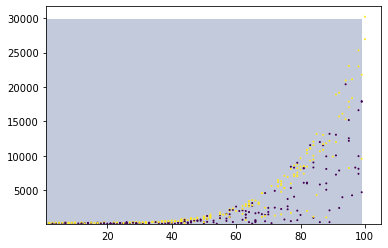

In [34]:

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np

import matplotlib.pyplot as plt

SEED = 5
np.random.seed(SEED)

def treinar_e_plotar(tipoModelo = LinearSVC()):
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.20, stratify=y)
    print("Vamos treinar %d elemntos e testaremos %d elementos" % (len(treino_x), len(teste_x)))

    modelo = tipoModelo
    modelo.fit(treino_x, treino_y)
    previsoes = modelo.predict(teste_x)
    acuracia = accuracy_score(teste_y, previsoes) * 100
    print("A acurácia foi de %.2f%%" % acuracia)

    x_min = teste_x.expected_hours.min()
    x_max = teste_x.expected_hours.max()
    y_min = teste_x.price.min()
    y_max = teste_x.price.max()

    pixels = 100
    eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
    eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

    xx, yy = np.meshgrid(eixo_x, eixo_y)
    pontos = np.c_[xx.ravel(), yy.ravel()]

    Z = modelo.predict(pontos)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y, s=1)


treinar_e_plotar()

Vamos treinar 1725 elemntos e testaremos 432 elementos
A acurácia foi de 58.56%


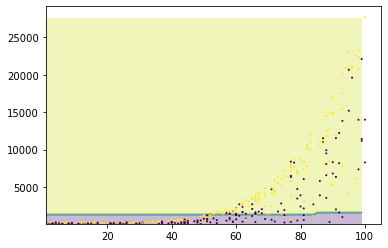

In [35]:
from sklearn.svm import SVC

treinar_e_plotar(tipoModelo=SVC())


Podemos observar relacionamentos diferentes para modelos de treinamento diferentes. No modelo `SVC()` podemos ver que
não é uma reta. E sim um curva, por mais que pareça linera, ela tem ondulações e variações.


Um dos fatores que afeta bastante o nosso treinamento, é a disparidade entre as escalas. O eixo x varia entre 1 e 100
 enquanto o eixo y varia de 0 a 30.000.

 Assim, faresmo também o treinamento da nossa escala do eixo Y, para que ela tenha menor sensibilidade devido a escala.

Vamos treinar 1725 elemntos e testaremos 432 elementos
A acurácia foi de 65.28%


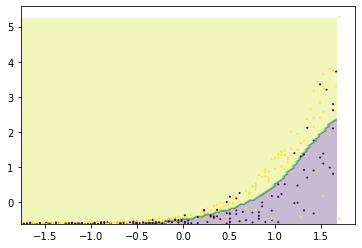

In [38]:
from sklearn.preprocessing import StandardScaler


def treinar_com_nova_escala_e_plotar(tipoModelo = LinearSVC()):
    raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.20, stratify=y)
    print("Vamos treinar %d elemntos e testaremos %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

    scaler = StandardScaler()
    scaler.fit(raw_treino_x)
    treino_x = scaler.transform(raw_treino_x)
    teste_x = scaler.transform(raw_teste_x)

    modelo = tipoModelo
    modelo.fit(treino_x, treino_y)
    previsoes = modelo.predict(teste_x)
    acuracia = accuracy_score(teste_y, previsoes) * 100
    print("A acurácia foi de %.2f%%" % acuracia)

    data_x = teste_x[:,0]
    data_y = teste_x[:,1]

    x_min = data_x.min()
    x_max = data_x.max()
    y_min = data_y.min()
    y_max = data_y.max()

    pixels = 100
    eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
    eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

    xx, yy = np.meshgrid(eixo_x, eixo_y)
    pontos = np.c_[xx.ravel(), yy.ravel()]

    Z = modelo.predict(pontos)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(data_x, data_y, c=teste_y, s=1)

treinar_com_nova_escala_e_plotar(tipoModelo=SVC())

Podemos perceber que a escala do **eixo y** foi dominída e podemos observar uma curva que acompanha e delimita a
região onde os valores da coluna **finished** devem 1 (curva de baixo) e 0 (curva de cima)